## Summary of this Case Study
- drug classification based on patient general information and its diagnosis. 
- various machine learning models to predict the outcome of the drugs type that might be suitable for the patient
    - used models: 
        - logistic regression
        - gaussian naive bayes
        - knn classifier
        - random forest classifier
        - svm classifier
        - xgb classifier

## importing libraries & reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style({"axes.grid":"True","grid.linestyle":":", "grid.color":"darkgray"})

In [2]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## defining features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## individual graphs of features

<AxesSubplot:xlabel='Sex', ylabel='Count'>

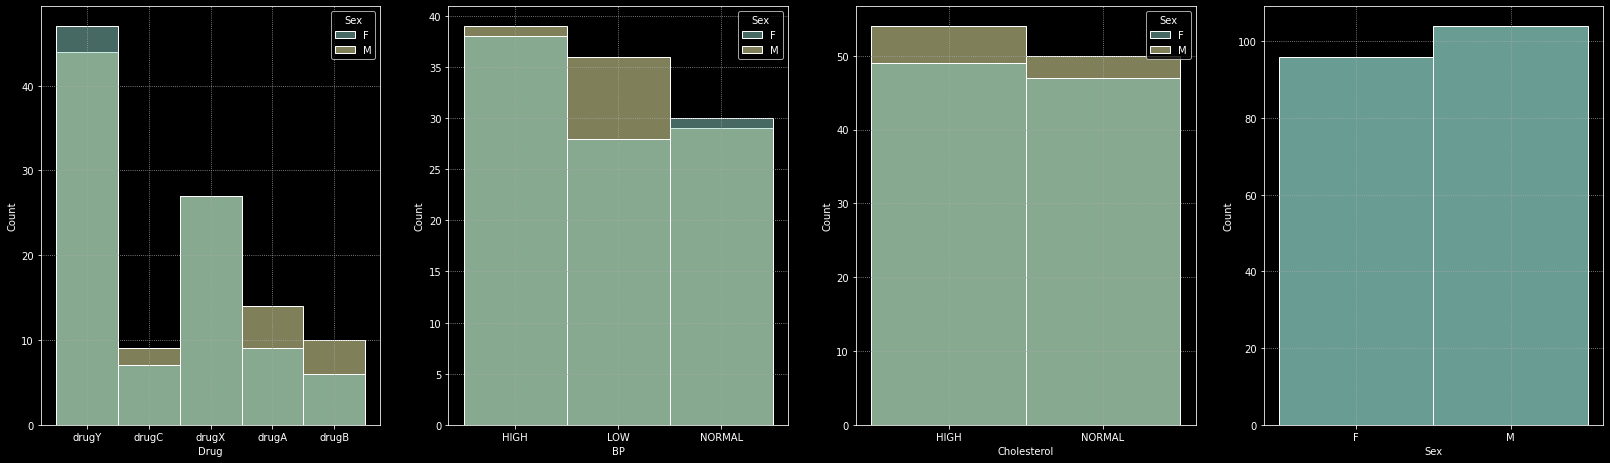

In [4]:
fig, ax = plt.subplots(1,4, figsize=(28,7.7))
sns.histplot(data=df, x="Drug", hue="Sex", ax=ax[0])
sns.histplot(data=df, x="BP", hue="Sex", ax=ax[1])
sns.histplot(data=df, x="Cholesterol", hue="Sex", ax=ax[2])
sns.histplot(data=df, x="Sex", ax=ax[3])

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<AxesSubplot:xlabel='Na_to_K', ylabel='Count'>

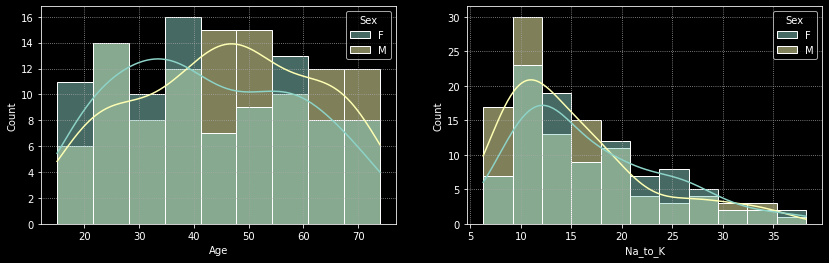

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
sns.histplot(data=df, x="Age", hue="Sex", kde=True, ax=axes[0])
sns.histplot(data=df, x="Na_to_K", hue="Sex", kde=True, ax=axes[1])

## exploration / EDA

/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(29.542606026785705, 0.5, 'Frequency')

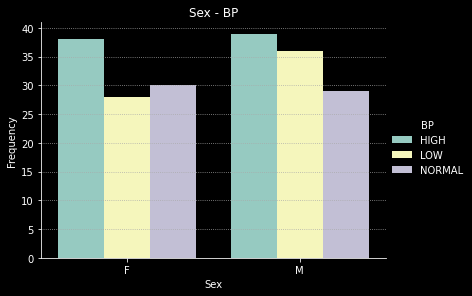

In [7]:
sns.catplot(x="Sex", hue="BP", data=df, kind="count", size=4, aspect=1.4)
plt.title("Sex - BP")
plt.ylabel("Frequency")

/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(29.51807570684523, 0.5, 'Frequency')

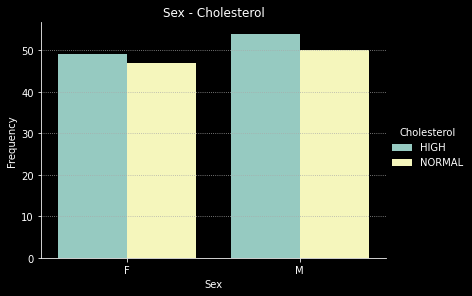

In [8]:
sns.catplot(x="Sex", hue="Cholesterol", data=df, kind="count", size=4, aspect=1.4)
plt.title("Sex - Cholesterol")
plt.ylabel("Frequency")

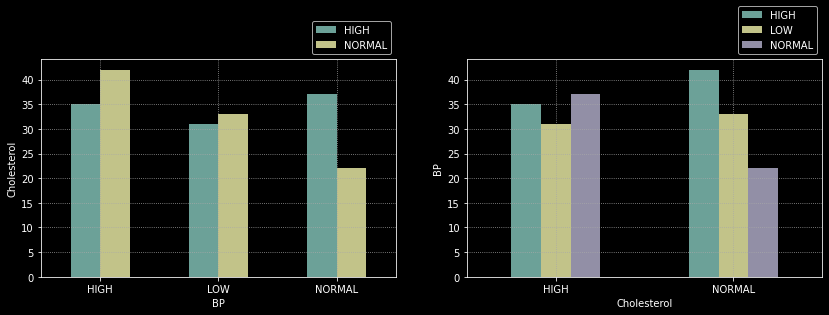

In [9]:
fig, axes = plt.subplots(1,2, figsize=(14,4))
pd.crosstab(df.BP, df.Cholesterol).plot(kind="bar", alpha=0.77, ax=axes[0])
pd.crosstab(df.Cholesterol, df.BP).plot(kind="bar", alpha=0.77, ax=axes[1])
axes[0].tick_params(labelrotation=0)
axes[1].tick_params(labelrotation=0)
axes[0].set_ylabel("Cholesterol")
axes[1].set_ylabel("BP")
axes[0].legend(loc="lower right", bbox_to_anchor=[1, 1])
axes[1].legend(loc="lower right", bbox_to_anchor=[1, 1])

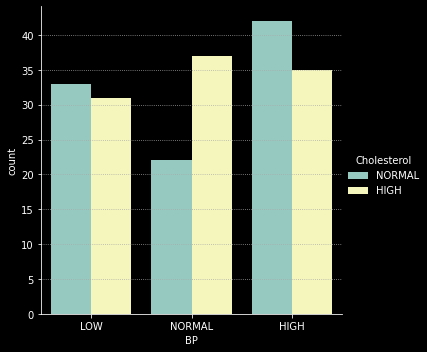

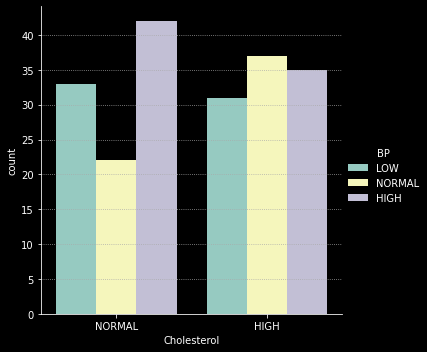

In [10]:
sns.catplot(x="BP", hue="Cholesterol", data=df, kind="count", order=["LOW", "NORMAL", "HIGH"], hue_order=["NORMAL", "HIGH"])
sns.catplot(x="Cholesterol", hue="BP", data=df, kind="count", order=["NORMAL", "HIGH"], hue_order=["LOW", "NORMAL", "HIGH"])

/opt/homebrew/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

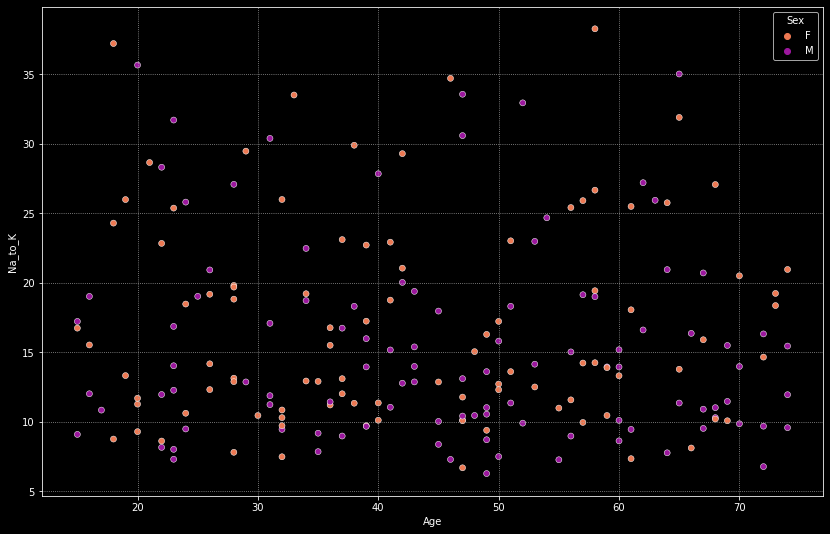

In [11]:
plt.figure(figsize=(14,9))
sns.scatterplot(df.Age,df.Na_to_K, hue=df.Sex, palette="plasma_r")

/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


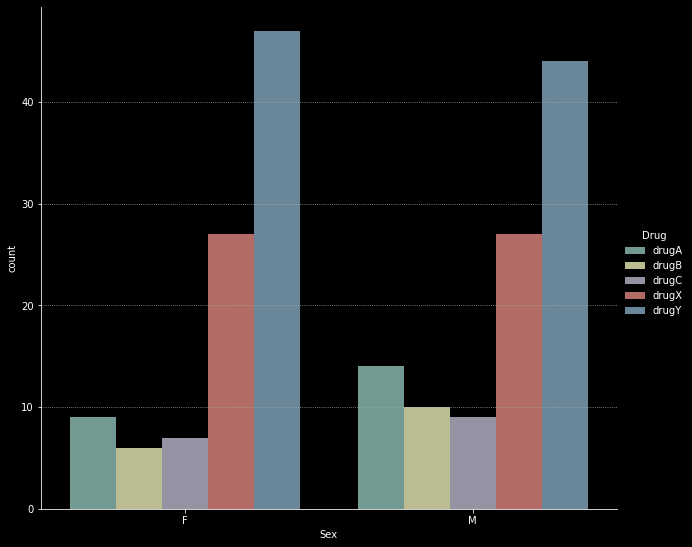

In [12]:
sns.catplot(data=df, x="Sex", hue="Drug", kind="count", hue_order=["drugA", "drugB", "drugC", "drugX", "drugY"], alpha=0.77, size=7.7, aspect=1.14)

/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


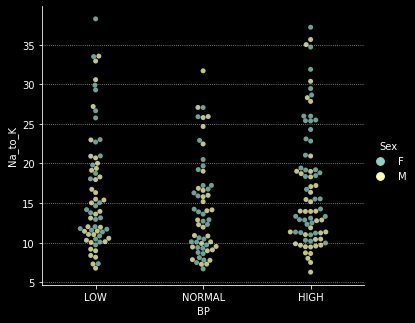

In [13]:
sns.catplot(x="BP", y="Na_to_K", hue="Sex", kind="swarm", data=df, alpha=0.77, size=4.6, aspect=1.14, order=["LOW", "NORMAL", "HIGH"])

In [14]:
df.Na_to_K.min()

6.269

In [15]:
df.Na_to_K.min()

6.269

In [16]:
df.Na_to_K.max()

38.247

In [17]:
df.Age.max()

74

## Data Preparation

#### data binning (categorise continous variables)

###### Bin Age

In [18]:
age_intervals = [0,19,29,39,49,59,69,90]
age_labels = ["<20s", "20s", "30s", "40s", "50s", "60s", ">60s"]
df["Age_cat"] = pd.cut(df.Age, bins=age_intervals, labels=age_labels)
df.drop("Age", axis=1, inplace=True)

###### Bin Na_to_K

In [19]:
NatoK_intervals = [0,9,19,29,39,90]
NatoK_labels = ["0-10", "10-20", "20-30", "30-40", ">40"]
df["Na_to_K_cat"] = pd.cut(df.Na_to_K, bins=NatoK_intervals, labels=NatoK_labels)
df.drop("Na_to_K", axis=1, inplace=True)

In [20]:
df

,Sex,BP,Cholesterol,Drug,Age_cat,Na_to_K_cat
0,F,HIGH,HIGH,drugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,0-10
4,F,LOW,HIGH,drugY,60s,10-20
...,...,...,...,...,...,...
195,F,LOW,HIGH,drugC,50s,10-20
196,M,LOW,HIGH,drugC,<20s,10-20
197,M,NORMAL,HIGH,drugX,50s,10-20
198,M,NORMAL,NORMAL,drugX,20s,10-20


#### train-test split

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop("Drug", axis=1)
y = df.Drug
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

#### encoding

In [22]:
X_train

,Sex,BP,Cholesterol,Age_cat,Na_to_K_cat
121,M,HIGH,NORMAL,<20s,10-20
170,F,NORMAL,HIGH,20s,10-20
97,F,HIGH,HIGH,50s,20-30
197,M,NORMAL,HIGH,50s,10-20
85,M,HIGH,HIGH,50s,10-20
...,...,...,...,...,...
186,M,HIGH,HIGH,>60s,10-20
116,M,NORMAL,NORMAL,60s,10-20
40,F,NORMAL,HIGH,>60s,20-30
69,F,HIGH,NORMAL,<20s,20-30


In [23]:
X_train.columns

Index(['Sex', 'BP', 'Cholesterol', 'Age_cat', 'Na_to_K_cat'], dtype='object')

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first", sparse=False)
X_train_encoded = ohe.fit_transform(X_train)
X_test_encoded = ohe.transform(X_test)

In [25]:
ohe.feature_names_in_

array(['Sex', 'BP', 'Cholesterol', 'Age_cat', 'Na_to_K_cat'], dtype=object)

In [26]:
ohe.categories_

[array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object),
 array(['20s', '30s', '40s', '50s', '60s', '<20s', '>60s'], dtype=object),
 array(['0-10', '10-20', '20-30', '30-40'], dtype=object)]

In [27]:
X_encoded_columns=["Sex_M", "BP_LOW", "BP_NORMAL", "CHOLESTEROL_NORMAL", "AGE_30s", "AGE_40s", "AGE_50s", "AGE_60s", "AGE_less_than_20s", "AGE_greater_than_60s", "NatoK_10-20", "NatoK_20-30", "NatoK_30-40"]
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_encoded_columns)
X_train_encoded

,Sex_M,BP_LOW,BP_NORMAL,CHOLESTEROL_NORMAL,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_less_than_20s,AGE_greater_than_60s,NatoK_10-20,NatoK_20-30,NatoK_30-40
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
156,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_encoded_columns)
X_test_encoded

,Sex_M,BP_LOW,BP_NORMAL,CHOLESTEROL_NORMAL,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_less_than_20s,AGE_greater_than_60s,NatoK_10-20,NatoK_20-30,NatoK_30-40
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### resampling

###### smote & random resample

In [29]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
over = SMOTE()
under = RandomUnderSampler()
resampler = Pipeline(steps=[("o",over),("u",under)])
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_encoded, y_train)

In [30]:
X_train_resampled

,Sex_M,BP_LOW,BP_NORMAL,CHOLESTEROL_NORMAL,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_less_than_20s,AGE_greater_than_60s,NatoK_10-20,NatoK_20-30,NatoK_30-40
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
361,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
363,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
y_train_resampled

0      drugA
1      drugA
2      drugA
3      drugA
4      drugA
       ...  
360    drugY
361    drugY
362    drugY
363    drugY
364    drugY
Name: Drug, Length: 365, dtype: object

<AxesSubplot:xlabel='count', ylabel='Drug'>

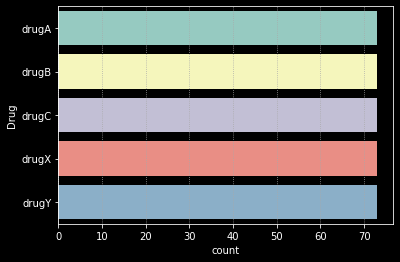

In [32]:
sns.countplot(data=df, y=y_train_resampled)

## model building

#### import models

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix

/opt/homebrew/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### parameter grids

In [34]:
#parameter grids
logreg_params = [{"penalty":["l2", "none"],"solver":["newton-cg", "lbfgs", "sag", "saga"],"C":[0.1, 0.5, 1, 10]},{"penalty":["elasticnet", "l1", "l2", "none"], "solver":["saga"], "C":[0.1, 0.5, 1, 10]}]
gnb_params = [{}]
knn_params = [{"n_neighbors":[4, 8, 12],"weights":["uniform", "distance"],"p":[1, 2]}]
rfc_params = [{"n_estimators":[50, 100, 150, 200],"criterion":["gini", "entropy"]}]
svm_params = [{"C":[0.1, 0.5, 1, 10], "kernel":["linear"]}, {"C":[0.1, 0.5, 1, 10], "gamma":["scale", "auto"], "kernel":["rbf", "sigmoid", "poly"], "degree":[2, 3, 4]}]
xgb_params = [{}]

#### model lists to feed in for loop

In [35]:
modelclasses = [
    ["logistic_regression", LogisticRegression(max_iter=1000), logreg_params],
    ["gaussian_naive_bayes", GaussianNB(), gnb_params],
    ["knn_classifier", KNeighborsClassifier(), knn_params],
    ["random_forest_classifier", RandomForestClassifier(), rfc_params],
    ["svm_classifier", SVC(), svm_params],
    ["xgb_classifier", XGBClassifier(), xgb_params]
]

#### runtime

In [36]:
import warnings
warnings.filterwarnings('ignore')
#GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4)
results = pd.DataFrame([], columns=["f1_score_weighted", "roc_auc_score", "accuracy_score"])
best_hyperparameters = []
for model_name, Model, param_grid in modelclasses:
    gridsearch = GridSearchCV(estimator=Model, param_grid=param_grid, cv=cv, n_jobs=-1)
    gridsearch.fit(X_train_resampled, y_train_resampled)
    y_pred = gridsearch.predict(X_test_encoded)
    f1 = f1_score(y_test, y_pred, average="weighted")
    rocauc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred))
    acc = accuracy_score(y_test, y_pred)
    results.loc[model_name] = [f1, rocauc, acc]
    best_hyperparameters.append((model_name, gridsearch.best_params_))

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

[23:27:13] WARNING: /private/var/folders/zw/hc2jwpf11cj5dg6fx9xhn4jh0000gn/T/pip-install-gqtk08_8/xgboost_ffb482743c444a8aa5c2ce84d855bc87/build/temp.macosx-12-arm64-3.10/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:13] WARNING: /private/var/folders/zw/hc2jwpf11cj5dg6fx9xhn4jh0000gn/T/pip-install-gqtk08_8/xgboost_ffb482743c444a8aa5c2ce84d855bc87/build/temp.macosx-12-arm64-3.10/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:13] WARNING: /private/var/folders/zw/hc2jwpf11cj5dg6fx9xhn4jh0000gn/T/pip-install-gqtk08_8/xgboost_ffb482743c444a8aa5c2ce84d855bc87/build/temp.macosx-12-arm64-3.10/xgboost/src

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when 

[23:27:13] WARNING: /private/var/folders/zw/hc2jwpf11cj5dg6fx9xhn4jh0000gn/T/pip-install-gqtk08_8/xgboost_ffb482743c444a8aa5c2ce84d855bc87/build/temp.macosx-12-arm64-3.10/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:13] WARNING: /private/var/folders/zw/hc2jwpf11cj5dg6fx9xhn4jh0000gn/T/pip-install-gqtk08_8/xgboost_ffb482743c444a8aa5c2ce84d855bc87/build/temp.macosx-12-arm64-3.10/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:13] WARNING: /private/var/folders/zw/hc2jwpf11cj5dg6fx9xhn4jh0000gn/T/pip-install-gqtk08_8/xgboost_ffb482743c444a8aa5c2ce84d855bc87/build/temp.macosx-12-arm64-3.10/xgboost/src

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when 

[23:27:14] WARNING: /private/var/folders/zw/hc2jwpf11cj5dg6fx9xhn4jh0000gn/T/pip-install-gqtk08_8/xgboost_ffb482743c444a8aa5c2ce84d855bc87/build/temp.macosx-12-arm64-3.10/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:14] WARNING: /private/var/folders/zw/hc2jwpf11cj5dg6fx9xhn4jh0000gn/T/pip-install-gqtk08_8/xgboost_ffb482743c444a8aa5c2ce84d855bc87/build/temp.macosx-12-arm64-3.10/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:14] WARNING: /private/var/folders/zw/hc2jwpf11cj5dg6fx9xhn4jh0000gn/T/pip-install-gqtk08_8/xgboost_ffb482743c444a8aa5c2ce84d855bc87/build/temp.macosx-12-arm64-3.10/xgboost/src

#### model comparison

In [37]:
results

,f1_score_weighted,roc_auc_score,accuracy_score
logistic_regression,0.723133,0.875377,0.725
gaussian_naive_bayes,0.724134,0.876219,0.725
knn_classifier,0.698847,0.867257,0.700
random_forest_classifier,0.679287,0.849059,0.675
svm_classifier,0.673297,0.859138,0.675
xgb_classifier,0.733333,0.835836,0.725


#### best parameters for each model

In [38]:
best_hyperparameters

[('logistic_regression', {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}),
 ('gaussian_naive_bayes', {}),
 ('knn_classifier', {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}),
 ('random_forest_classifier', {'criterion': 'gini', 'n_estimators': 150}),
 ('svm_classifier', {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}),
 ('xgb_classifier', {})]

#### confusion matrix

In [40]:
y_pred

array(['drugX', 'drugX', 'drugC', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugA', 'drugB', 'drugY', 'drugX', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugB', 'drugC', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugB',
       'drugX', 'drugY', 'drugX', 'drugC', 'drugY'], dtype=object)

<AxesSubplot:>

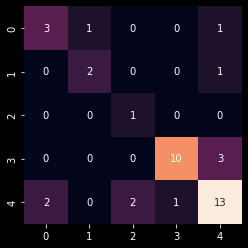

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, square=True)